# refellips demo: Solid/Air
This demo presents a comparison between refellips and WVASE outputs for spectroscopic ellipsometry of a 2 nm SiO$_2$ layer and 50 nm PNIPAM brush exposed to water.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from refnx.analysis import CurveFitter
from refnx.reflect import Slab

In [3]:
from refellips.dataSE import DataSE, open_EP4file
from refellips.reflect_modelSE import ReflectModelSE
from refellips.objectiveSE import ObjectiveSE
from refellips.structureSE import RI

### Import data

In [4]:
#Ellipsometry data modelled in WVASE
WVASE_test = pd.read_csv(open('WVASE_example_2nmSiO2_50nmPNIPAM_50EMA_MultiWavelength.txt','r'), delimiter='\t')

### Build model

In [5]:
si     = RI('../materials/silicon.csv')
sio2   = RI('../materials/silica.csv')
PNIPAM = RI(A = 1.47, B = 0.00495)
air    = RI('../materials/air.csv')
h2o    = RI('../materials/water.csv')

polymer_layer = PNIPAM(500)
polymer_layer.name = 'PNIPAM'
polymer_layer.vfsolv.setp(value=0.5)
polymer_layer.thick.setp(vary=True, bounds=(100,1000))

struc = h2o(np.inf) | polymer_layer | sio2(20) | si(np.inf)
struc.solvent= h2o

# Comparison of refellips and WVASE outputs for a 2 nm SiO$_2$ and 50 nm PNIPAM system with 50% VF solvent

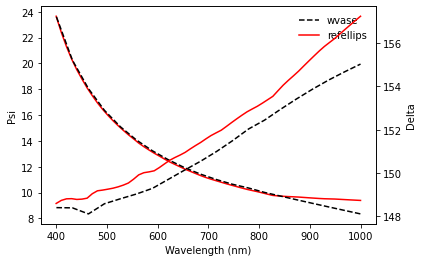

In [6]:
fig, ax = plt.subplots()
axt = ax.twinx()
psis = []
deltas = []

wavelengths = np.linspace(400,1000,60)

for w in wavelengths:
    model = ReflectModelSE(struc, wavelength=w, delta_offset=0)
    psi, delta = model(65)
    psis.append(psi)
    deltas.append(delta)

ax.plot(WVASE_test['nm'], WVASE_test['Psi'],ls='--', color='k', zorder=5, label='wvase')
axt.plot(WVASE_test['nm'], WVASE_test['Delta'],ls='--', color='k', zorder=5)

ax.plot(wavelengths, psis, color='r', label='refellips')
axt.plot(wavelengths, deltas, color='r')

ax.legend(frameon=False)
ax.set(ylabel='Psi', xlabel='Wavelength (nm)')
axt.set(ylabel='Delta')
plt.show()